tive que fazer uma adaptação do modelo do wooldridge, baixei manualmente os dados a partir de 2014 (onde tem o código da uf e todas as variáveis disponíveis), e como não tenho o uso de cigarros, vou fazer uma análise a partir de hipóteses, vou pegar 5% de cada ano para analisar sem sobrecarregar o computador

hipóteses:

1️⃣ Idade materna

Hipótese: Idade materna muito baixa (<20 anos) ou muito alta (≥35 anos) ↑ probabilidade de baixo peso ao nascer.
Variáveis independentes:

IDADEMAE (criar categorias: <20, 20–34, ≥35)

2️⃣ Escolaridade materna

Hipótese: Menor escolaridade da mãe ↑ risco de baixo peso ao nascer.
Variáveis independentes:

ESCMAE ou ESCMAEAGR1 (anos de estudo ou categorias: sem escolaridade, fundamental, médio, superior)

3️⃣ Assistência pré-natal

Hipótese: Menos consultas de pré-natal ↑ risco de baixo peso.
Variáveis independentes:

CONSULTAS ou CONSPRENAT (número de consultas ou categorias: nenhuma, 1–3, 4–6, 7+)

MESPRENAT (mês de início do pré-natal)

KOTELCHUCK (índice de adequação do pré-natal)

4️⃣ Tipo de gravidez

Hipótese: Gravidez múltipla (gêmeos ou mais) ↑ risco de baixo peso.
Variáveis independentes:

GRAVIDEZ (1 = única, 2 = dupla, 3+ = tripla ou mais)

QTDPARTNOR / QTDPARTCES (número de partos anteriores, para controlar efeito histórico)

5️⃣ Tipo de parto e prematuridade

Hipótese: Cesárea eletiva antes de 37 semanas ↑ risco de baixo peso.
Variáveis independentes:

PARTO (1 = vaginal, 2 = cesáreo)

STCESPARTO (cesárea antes do trabalho de parto)

SEMAGESTAC ou GESTACAO (semanas de gestação, para definir prematuridade <37)

6️⃣ Sexo do bebê

Hipótese: Bebês do sexo feminino têm maior probabilidade de baixo peso ao nascer.
Variáveis independentes:

SEXO (1 = masculino, 2 = feminino)

7️⃣ Raça/cor da mãe

Hipótese: Crianças nascidas de mães negras ou pardas ↑ risco de baixo peso (associado a desigualdades socioeconômicas e acesso à saúde).
Variáveis independentes:

RACACORMAE ou RACACOR (tipos de raça/cor da mãe)

8️⃣ Número de gestações anteriores

Hipótese: Nulíparas ou mulheres com muitas gestações anteriores ↑ risco de baixo peso.
Variáveis independentes:

QTDGESTANT (número de gestações anteriores)

QTDFILVIVO (número de filhos vivos)

QTDFILMORT (número de perdas fetais anteriores)

9️⃣ Local de nascimento / assistência ao parto

Hipótese: Nascimentos em domicílio ou locais com menos infraestrutura ↑ risco de baixo peso.
Variáveis independentes:

LOCNASC (1 = hospital, 2 = outro estabelecimento, 3 = domicílio, etc.)

TPFUNCRESP (profissional que realizou registro: médico, enfermeiro, parteira)

10️⃣ Prematuridade

Hipótese: Prematuridade (menos de 37 semanas) ↑ risco de baixo peso.
Variáveis independentes:

SEMAGESTAC ou GESTACAO (semanas de gestação)

Pode criar variável binária: prematuro = 1 (<37 semanas), 0 caso contrário

criando variável dependente com bweight < 2500 sendo baixo peso de acordo com a OMS

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('dados.csv')

/tmp/ipython-input-981007468.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dados.csv')


In [ ]:
df['BAIXO_PESO'] = df['PESO'] < 2500

In [ ]:
df["SEXO"] = df["SEXO"].replace(0, np.nan).replace('I', np.nan)

In [ ]:
df["SEXO"] = df["SEXO"].replace({
    "M": 1,
    "F": 2,
    "1": 1,
    "2": 2
}).astype("Int64")  # Int64 permite NA


/tmp/ipython-input-4149014343.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["SEXO"] = df["SEXO"].replace({


In [ ]:
df['SEXO'].value_counts()

,count
SEXO,
1,143663
2,137084


In [ ]:
df['DT_NASC'] = pd.to_datetime(df['DT_NASC'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280790 entries, 0 to 280789
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  280790 non-null  int64         
 1   PESO        280707 non-null  float64       
 2   IDADEMAE    280786 non-null  float64       
 3   ESCMAE2010  276987 non-null  float64       
 4   CONSULTAS   280677 non-null  float64       
 5   CONSPRENAT  275550 non-null  float64       
 6   MESPRENAT   272879 non-null  float64       
 7   KOTELCHUCK  280790 non-null  int64         
 8   GRAVIDEZ    280470 non-null  float64       
 9   QTDPARTNOR  267067 non-null  float64       
 10  QTDPARTCES  265500 non-null  float64       
 11  PARTO       280577 non-null  float64       
 12  STCESPARTO  250537 non-null  float64       
 13  SEMAGESTAC  276269 non-null  float64       
 14  GESTACAO    276425 non-null  float64       
 15  SEXO        280747 non-null  Int64         
 16  RA

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [ ]:
df.head()

,Unnamed: 0,PESO,IDADEMAE,ESCMAE2010,CONSULTAS,CONSPRENAT,MESPRENAT,KOTELCHUCK,GRAVIDEZ,QTDPARTNOR,...,SEMAGESTAC,GESTACAO,SEXO,RACACORMAE,PARIDADE,RACACOR,QTDFILVIVO,QTDFILMORT,DT_NASC,BAIXO_PESO
0,0,3000.0,18.0,4.0,3.0,6.0,3.0,4,1.0,0.0,...,38.0,5.0,2,4.0,0,4.0,0.0,0.0,2014-01-15,False
1,1,3994.0,35.0,3.0,3.0,5.0,5.0,2,1.0,0.0,...,38.0,5.0,2,4.0,1,4.0,2.0,1.0,2014-02-19,False
2,2,2820.0,32.0,1.0,3.0,6.0,3.0,4,1.0,1.0,...,38.0,5.0,1,NaN,1,NaN,1.0,NaN,2014-05-19,False
3,3,3000.0,17.0,2.0,4.0,7.0,3.0,5,1.0,1.0,...,43.0,6.0,2,4.0,1,4.0,1.0,NaN,2014-02-20,False
4,4,2690.0,21.0,4.0,3.0,6.0,2.0,4,1.0,NaN,...,39.0,5.0,2,4.0,0,4.0,NaN,NaN,2014-06-10,False


In [ ]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Análise descritiva dos dados pré-tratamento de nulos')

In [ ]:
profile.to_file('Analise_descritiva_pre.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 22/22 [00:11<00:00,  1.88it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

PESO ↔ BAIXO_PESO

BAIXO_PESO foi derivado de PESO.

Se o modelo logit tem como dependente BAIXO_PESO, não use PESO como preditor.

✅ Mantenha apenas BAIXO_PESO (variável-alvo).

GESTACAO ↔ SEMAGESTAC ↔ BAIXO_PESO

GESTACAO: categorizada (faixas de semanas).

SEMAGESTAC: contínua (semanas exatas).

BAIXO_PESO tem dependência biológica direta da idade gestacional (prematuros tendem a nascer com baixo peso).

✅ Use SEMAGESTAC como variável independente (mais informativa).

❌ Retire GESTACAO.

CONSULTAS ↔ CONSPRENAT ↔ KOTELCHUCK ↔ MESPRENAT

Todas medem aspectos de pré-natal.

KOTELCHUCK já é um índice consolidado de adequação do pré-natal.

✅ Sugestão: manter KOTELCHUCK.

Opcional: se quiser granularidade, use CONSULTAS (número bruto).

❌ Retirar CONSPRENAT e MESPRENAT para evitar duplicidade.

PARTO ↔ STCESPARTO

PARTO: vaginal ou cesáreo.

STCESPARTO: detalha apenas o cesáreo antes do trabalho de parto.

✅ Sugestão: manter PARTO (mais geral).

❌ Retirar STCESPARTO.

QTDFILVIVO ↔ QTDPARTNOR

São praticamente a mesma coisa (número de filhos vivos ≈ partos vaginais anteriores).

✅ Escolha QTDFILVIVO (mais abrangente).

❌ Retirar QTDPARTNOR.

RACACOR ↔ RACACORMAE

RACACOR: do recém-nascido.

RACACORMAE: da mãe.

São correlacionadas, mas não idênticas (a mãe parda não garante RN pardo, por exemplo).

✅ Pode manter RACACORMAE (mais estável, menos sujeito a erros de preenchimento).

Opcional: testar modelos alternativos mantendo os dois.

correlação entre variáveis usando vif

In [ ]:
features = [
    "IDADEMAE",
    "ESCMAE2010",
    "GRAVIDEZ",
    "SEMAGESTAC",
    "PARTO",
    "CONSULTAS",
    "RACACORMAE",
    "QTDFILVIVO",
    "QTDFILMORT",
    "SEXO"
]

In [ ]:
df = df.filter(features + ['BAIXO_PESO'])

In [ ]:
df

,IDADEMAE,ESCMAE2010,GRAVIDEZ,SEMAGESTAC,PARTO,CONSULTAS,RACACORMAE,QTDFILVIVO,QTDFILMORT,SEXO,BAIXO_PESO
0,18.0,4.0,1.0,38.0,1.0,3.0,4.0,0.0,0.0,2,False
1,35.0,3.0,1.0,38.0,2.0,3.0,4.0,2.0,1.0,2,False
2,32.0,1.0,1.0,38.0,1.0,3.0,NaN,1.0,NaN,1,False
3,17.0,2.0,1.0,43.0,1.0,4.0,4.0,1.0,NaN,2,False
4,21.0,4.0,1.0,39.0,1.0,3.0,4.0,NaN,NaN,2,False
...,...,...,...,...,...,...,...,...,...,...,...
280785,37.0,5.0,1.0,39.0,2.0,4.0,4.0,1.0,0.0,1,False
280786,25.0,2.0,1.0,35.0,1.0,4.0,4.0,1.0,0.0,1,False
280787,24.0,5.0,1.0,38.0,2.0,4.0,4.0,1.0,0.0,1,False
280788,37.0,5.0,1.0,39.0,2.0,4.0,1.0,0.0,1.0,2,False


agora analisando para cada variável as condições de nulidade

In [ ]:
# idademae
import numpy as np

df['IDADEMAE'] = df['IDADEMAE'].replace(99, np.nan)

# escmae2010
df['ESCMAE2010'] = df['ESCMAE2010'].replace(9, np.nan)

# gravidez
df['GRAVIDEZ'] = df['GRAVIDEZ'].replace(9, np.nan)

# parto
df['PARTO'] = df['PARTO'].replace(9, np.nan).replace(2, 0) # retira nulos e deixa como variável booleana, sendo 0 - cesárea e 1 - vaginal

# consultas -> aqui coloquei no lugar do kotelchuck por não ter uma documentação adequada, o valor 5 estava com 62% no kotelchuck e não se sabe do que se trata
df['CONSULTAS'] = df['CONSULTAS'].replace(9, np.nan)

# racacormae
df['RACACORMAE'] = df['RACACORMAE'].replace(9, np.nan)

In [ ]:
df['SEXO'].value_counts()

,count
SEXO,
1,143663
2,137084


In [ ]:
df['SEXO'] = df['SEXO'].replace(2, 0)

In [ ]:
# dropando nulos
df = df.dropna()

In [ ]:
df

,IDADEMAE,ESCMAE2010,GRAVIDEZ,SEMAGESTAC,PARTO,CONSULTAS,RACACORMAE,QTDFILVIVO,QTDFILMORT,SEXO,BAIXO_PESO
0,18.0,4.0,1.0,38.0,1.0,3.0,4.0,0.0,0.0,0,False
1,35.0,3.0,1.0,38.0,0.0,3.0,4.0,2.0,1.0,0,False
5,18.0,2.0,1.0,41.0,0.0,3.0,4.0,0.0,0.0,0,True
6,29.0,3.0,1.0,39.0,0.0,1.0,4.0,0.0,0.0,1,False
7,18.0,3.0,1.0,36.0,1.0,3.0,4.0,0.0,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...
280785,37.0,5.0,1.0,39.0,0.0,4.0,4.0,1.0,0.0,1,False
280786,25.0,2.0,1.0,35.0,1.0,4.0,4.0,1.0,0.0,1,False
280787,24.0,5.0,1.0,38.0,0.0,4.0,4.0,1.0,0.0,1,False
280788,37.0,5.0,1.0,39.0,0.0,4.0,1.0,0.0,1.0,0,False


In [ ]:
# Ajuste de tipos
df = df.astype({
    "IDADEMAE": "int",
    "SEMAGESTAC": "int",
    "CONSULTAS": "category",
    "QTDFILVIVO": "int",
    "QTDFILMORT": "int",
    "ESCMAE2010": "category",
    "GRAVIDEZ": "category",
    "PARTO": "category",
    "RACACORMAE": "category",
    "SEXO": "category",  # ou int se quiser manter 0/1
    "BAIXO_PESO": "bool"
})


In [ ]:
# transformando variaveis categoricas

# ESCMAE2010: Escolaridade da mãe
df['ESCMAE2010'] = df['ESCMAE2010'].map({
    0: 'Sem escolaridade',
    1: 'Fundamental I (1ª a 4ª série)',
    2: 'Fundamental II (5ª a 8ª série)',
    3: 'Médio (antigo 2º Grau)',
    4: 'Superior incompleto',
    5: 'Superior completo',
    9: 'Ignorado'
})

# GRAVIDEZ: Tipo de gravidez
df['GRAVIDEZ'] = df['GRAVIDEZ'].map({
    1: 'Única',
    2: 'Dupla',
    3: 'Tripla ou mais',
    9: 'Ignorado'
})

# PARTO: Tipo de parto
df['PARTO'] = df['PARTO'].map({
    1: 'Vaginal',
    0: 'Cesário',
    9: 'Ignorado'
})

# CONSULTAS: Número de consultas pré-natal
df['CONSULTAS'] = df['CONSULTAS'].map({
    1: 'Nenhuma',
    2: '1 a 3',
    3: '4 a 6',
    4: '7 ou mais',
    9: 'Ignorado'
})

# RACACORMAE: Raça/cor da mãe
df['RACACORMAE'] = df['RACACORMAE'].map({
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena'
})

# SEXO: Sexo do recém-nascido
df['SEXO'] = df['SEXO'].map({
    1: 'Masculino',
    0: 'Feminino',
    0: 'Ignorado'
})


In [ ]:
# garantindo tipagens para o vif

# Converter variáveis numéricas para float
numerical_cols = ['IDADEMAE', 'SEMAGESTAC', 'QTDFILVIVO', 'QTDFILMORT']
df[numerical_cols] = df[numerical_cols].astype(int)

# Garantir que bool vire float também
df['BAIXO_PESO'] = df['BAIXO_PESO'].astype(int)

# Variáveis categóricas já podem ficar como 'category' ou depois transformadas em dummies
categorical_cols = ['ESCMAE2010', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'RACACORMAE', 'SEXO']
df[categorical_cols] = df[categorical_cols].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249954 entries, 0 to 280789
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   IDADEMAE    249954 non-null  int64   
 1   ESCMAE2010  249954 non-null  category
 2   GRAVIDEZ    249954 non-null  category
 3   SEMAGESTAC  249954 non-null  int64   
 4   PARTO       249954 non-null  category
 5   CONSULTAS   249954 non-null  category
 6   RACACORMAE  249954 non-null  category
 7   QTDFILVIVO  249954 non-null  int64   
 8   QTDFILMORT  249954 non-null  int64   
 9   SEXO        249954 non-null  category
 10  BAIXO_PESO  249954 non-null  int64   
dtypes: category(6), int64(5)
memory usage: 12.9 MB


In [ ]:
# gerando novo report para ver como ficou os dados pos analise descritiva e tratamento
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Análise descritiva dos dados pós-tratamento de nulos')
profile.to_file('Analise_descritiva_pos.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 11.18it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df['SEXO'] = df['SEXO'].replace('Ignorado', 'Feminino')

/tmp/ipython-input-2390796693.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['SEXO'] = df['SEXO'].replace('Ignorado', 'Feminino')


In [ ]:
df['SEXO'].value_counts()

,count
SEXO,
Masculino,127734
Feminino,122220


realizando o teste VIF é percebido que houve multicolinearidade em escolaridade, pois quem tem superior tem que ter ensino médio por exemplo, e consultas também, pois quem tem mais de 3 consultas tem que ter pelo menos duas já realizadas

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleciona apenas as features (sem a target BAIXO_PESO)
X = df.drop(columns=["BAIXO_PESO"]).copy()

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Remover linhas com NaN (se aparecerem depois do get_dummies)
X = X.dropna()

# Converte qualquer coluna para float (0.0/1.0)
X = X.astype(float)

# Adicionar constante
X = sm.add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))


                                      feature         VIF
0                                       const  692.705019
7           ESCMAE2010_Médio (antigo 2º Grau)   67.038454
6   ESCMAE2010_Fundamental II (5ª a 8ª série)   47.156122
9                ESCMAE2010_Superior completo   37.617006
15                        CONSULTAS_7 ou mais   15.787114
8              ESCMAE2010_Superior incompleto   13.883362
14                            CONSULTAS_4 a 6   13.429985
5    ESCMAE2010_Fundamental I (1ª a 4ª série)   10.540005
13                            CONSULTAS_1 a 3    4.910901
1                                    IDADEMAE    1.603177
3                                  QTDFILVIVO    1.569992
18                           RACACORMAE_Parda    1.236894
16                           RACACORMAE_Preta    1.124764
12                              PARTO_Vaginal    1.120862
2                                  SEMAGESTAC    1.096778
4                                  QTDFILMORT    1.062194
19            

In [ ]:
df['CONSULTAS'].value_counts()

,count
CONSULTAS,
7 ou mais,180047
4 a 6,52728
1 a 3,13872
Nenhuma,3307


In [ ]:
df["CONSULTAS_BIN"] = df["CONSULTAS"].replace({
    "Nenhuma": 0,
    "1 a 3": 0,
    "4 a 6": 0,
    "7 ou mais": 1
}).astype(int)


/tmp/ipython-input-1048626783.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["CONSULTAS_BIN"] = df["CONSULTAS"].replace({


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleciona apenas as features (sem a target BAIXO_PESO)
X = df.drop(columns=["BAIXO_PESO", 'CONSULTAS']).copy()

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Remover linhas com NaN (se aparecerem depois do get_dummies)
X = X.dropna()

# Converte qualquer coluna para float (0.0/1.0)
X = X.astype(float)

# Adicionar constante
X = sm.add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))


                                      feature         VIF
0                                       const  628.333604
8           ESCMAE2010_Médio (antigo 2º Grau)   66.971336
7   ESCMAE2010_Fundamental II (5ª a 8ª série)   47.119218
10               ESCMAE2010_Superior completo   37.587073
9              ESCMAE2010_Superior incompleto   13.871638
6    ESCMAE2010_Fundamental I (1ª a 4ª série)   10.533965
1                                    IDADEMAE    1.599842
3                                  QTDFILVIVO    1.562676
16                           RACACORMAE_Parda    1.236816
5                               CONSULTAS_BIN    1.130669
14                           RACACORMAE_Preta    1.124627
13                              PARTO_Vaginal    1.119425
2                                  SEMAGESTAC    1.092985
4                                  QTDFILMORT    1.062145
17                        RACACORMAE_Indígena    1.058698
11                             GRAVIDEZ_Dupla    1.053249
15            

In [ ]:
df["ESCMAE3"] = df["ESCMAE2010"].replace({
    "Sem escolaridade": "Fundamental ou menos",
    "Fundamental I (1ª a 4ª série)": "Fundamental ou menos",
    "Fundamental II (5ª a 8ª série)": "Fundamental ou menos",
    "Médio (antigo 2º Grau)": "Médio",
    "Superior incompleto": "Médio",
    "Superior completo": "Superior"
})


/tmp/ipython-input-1563267490.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["ESCMAE3"] = df["ESCMAE2010"].replace({


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249954 entries, 0 to 280789
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   IDADEMAE       249954 non-null  int64   
 1   ESCMAE2010     249954 non-null  category
 2   GRAVIDEZ       249954 non-null  category
 3   SEMAGESTAC     249954 non-null  int64   
 4   PARTO          249954 non-null  category
 5   CONSULTAS      249954 non-null  category
 6   RACACORMAE     249954 non-null  category
 7   QTDFILVIVO     249954 non-null  int64   
 8   QTDFILMORT     249954 non-null  int64   
 9   SEXO           249954 non-null  category
 10  BAIXO_PESO     249954 non-null  int64   
 11  CONSULTAS_BIN  249954 non-null  int64   
 12  ESCMAE3        249954 non-null  category
dtypes: category(7), int64(6)
memory usage: 23.1 MB


In [ ]:
df['RACACORMAE'].value_counts()

,count
RACACORMAE,
Parda,139076
Branca,91554
Preta,15980
Indígena,2224
Amarela,1120


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleciona apenas as features (sem a target BAIXO_PESO)
X = df.drop(columns=["BAIXO_PESO", 'CONSULTAS', 'ESCMAE2010']).copy()

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Remover linhas com NaN (se aparecerem depois do get_dummies)
X = X.dropna()

# Converte qualquer coluna para float (0.0/1.0)
X = X.astype(float)

# Adicionar constante
X = sm.add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))


                    feature         VIF
0                     const  359.203378
15         ESCMAE3_Superior    1.928048
1                  IDADEMAE    1.585622
14            ESCMAE3_Médio    1.536040
3                QTDFILVIVO    1.529739
11         RACACORMAE_Parda    1.232083
5             CONSULTAS_BIN    1.130321
9          RACACORMAE_Preta    1.123748
8             PARTO_Vaginal    1.116654
2                SEMAGESTAC    1.092839
4                QTDFILMORT    1.061954
6            GRAVIDEZ_Dupla    1.053224
12      RACACORMAE_Indígena    1.039674
10       RACACORMAE_Amarela    1.007996
7   GRAVIDEZ_Tripla ou mais    1.004368
13           SEXO_Masculino    1.000581


In [ ]:
df.to_csv('dados_modelo.csv')

# rodando o modelo

In [ ]:
import statsmodels.api as sm

# Define X e y
X = df.drop(columns=["BAIXO_PESO", 'CONSULTAS', 'ESCMAE2010']).copy()
y = df["BAIXO_PESO"].astype(int)  # 0/1 para logit

# Transformar categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Remover NaNs, se houver
X = X.dropna()
y = y.loc[X.index]

X = X.astype(int)

# Adiciona constante
X = sm.add_constant(X)

# Ajusta modelo logit
logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=True)

# Resumo
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.199540
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             BAIXO_PESO   No. Observations:               249954
Model:                          Logit   Df Residuals:                   249938
Method:                           MLE   Df Model:                           15
Date:                Thu, 02 Oct 2025   Pseudo R-squ.:                  0.3314
Time:                        14:39:07   Log-Likelihood:                -49876.
converged:                       True   LL-Null:                       -74596.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      20.8641      0.158    131.869      0.000      20.554   

In [ ]:
# Efeitos marginais
marginal_effects = result.get_margeff()
print(marginal_effects.summary())


        Logit Marginal Effects       
Dep. Variable:             BAIXO_PESO
Method:                          dydx
At:                           overall
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
IDADEMAE                    0.0006   8.43e-05      7.153      0.000       0.000       0.001
SEMAGESTAC                 -0.0326      0.000   -147.334      0.000      -0.033      -0.032
QTDFILVIVO                 -0.0082      0.000    -17.518      0.000      -0.009      -0.007
QTDFILMORT                  0.0057      0.001      7.883      0.000       0.004       0.007
CONSULTAS_BIN              -0.0219      0.001    -21.319      0.000      -0.024      -0.020
GRAVIDEZ_Dupla              0.1108      0.002     60.510      0.000       0.107       0.114
GRAVIDEZ_Tripla ou mais     0.1867      0.023      7.984      0.000       0.141       0.233
PARTO_Vaginal       

/tmp/ipython-input-267225886.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dy_dx', y='Variavel', data=categoricas, palette='coolwarm')


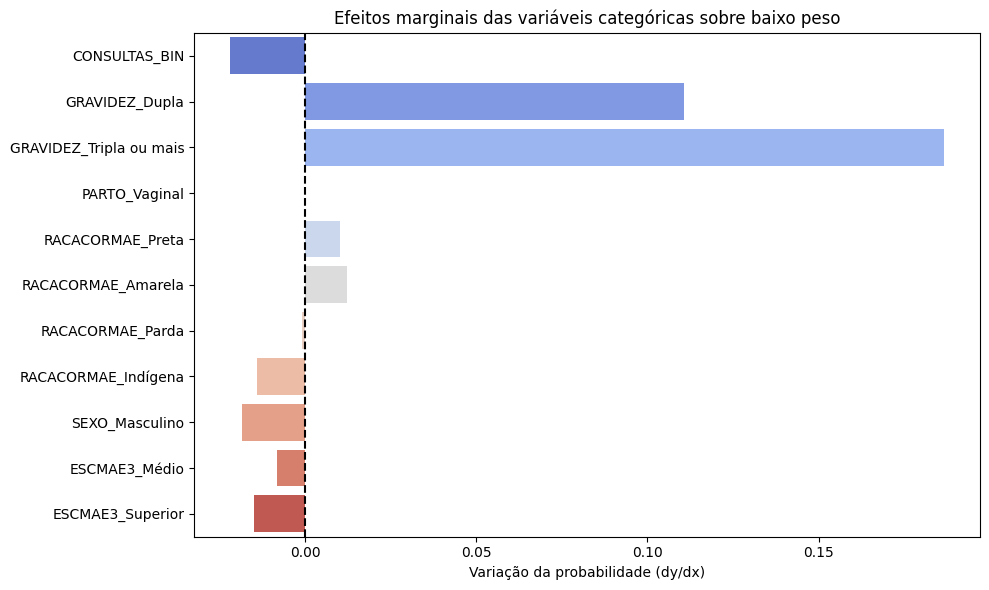

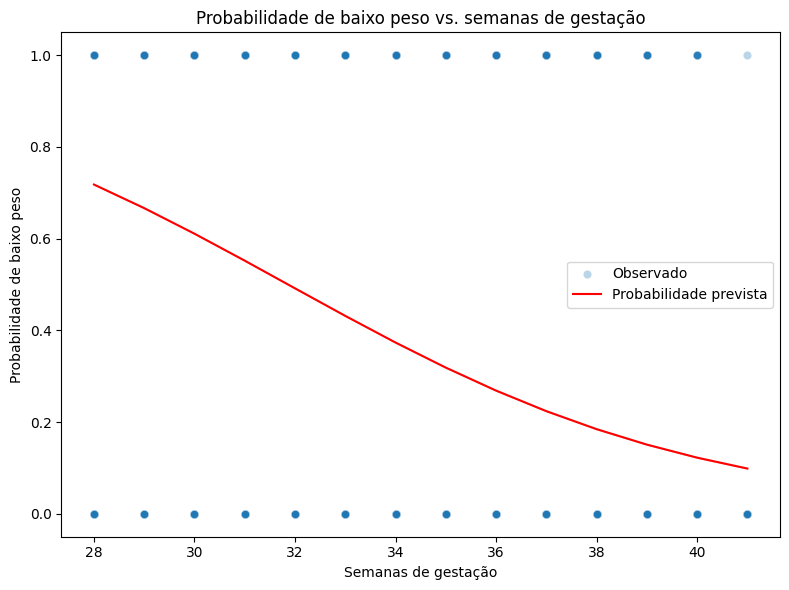

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===============================
# Supondo que você já tenha os efeitos marginais
# ===============================
efeitos_marginais = pd.DataFrame({
    'Variavel': ['IDADEMAE', 'SEMAGESTAC', 'QTDFILVIVO', 'QTDFILMORT',
                 'CONSULTAS_BIN', 'GRAVIDEZ_Dupla', 'GRAVIDEZ_Tripla ou mais',
                 'PARTO_Vaginal', 'RACACORMAE_Preta', 'RACACORMAE_Amarela',
                 'RACACORMAE_Parda', 'RACACORMAE_Indígena', 'SEXO_Masculino',
                 'ESCMAE3_Médio', 'ESCMAE3_Superior'],
    'dy_dx': [0.0006, -0.0326, -0.0082, 0.0057, -0.0219, 0.1108, 0.1867, -0.0000269,
              0.0102, 0.0123, -0.0008, -0.0139, -0.0183, -0.0081, -0.0150]
})

# Separando contínuas e categóricas
continuas = ['IDADEMAE', 'SEMAGESTAC', 'QTDFILVIVO', 'QTDFILMORT']
categoricas = efeitos_marginais[~efeitos_marginais['Variavel'].isin(continuas)]

# ===============================
# 1. Gráfico de barras para variáveis categóricas
# ===============================
plt.figure(figsize=(10,6))
sns.barplot(x='dy_dx', y='Variavel', data=categoricas, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title('Efeitos marginais das variáveis categóricas sobre baixo peso')
plt.xlabel('Variação da probabilidade (dy/dx)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# ===============================
# 2. Gráfico de probabilidade prevista para variável contínua
# ===============================
# Exemplo: SEMAGESTAC (semanas de gestação)
# Supondo que você tenha o modelo logit rodado com statsmodels
import statsmodels.api as sm

# Exemplo simples: dados fictícios para demonstração
np.random.seed(42)
n = 1000
SEMAGESTAC = np.random.randint(28, 42, n)
BAIXO_PESO = (np.random.rand(n) < (42 - SEMAGESTAC) * 0.05).astype(int)
X = sm.add_constant(SEMAGESTAC)
model = sm.Logit(BAIXO_PESO, X).fit(disp=0)
pred_probs = model.predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=SEMAGESTAC, y=BAIXO_PESO, alpha=0.3, label='Observado')
sns.lineplot(x=SEMAGESTAC, y=pred_probs, color='red', label='Probabilidade prevista')
plt.title('Probabilidade de baixo peso vs. semanas de gestação')
plt.xlabel('Semanas de gestação')
plt.ylabel('Probabilidade de baixo peso')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-1241061987.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variavel', y='dy_dx', data=categoricas,


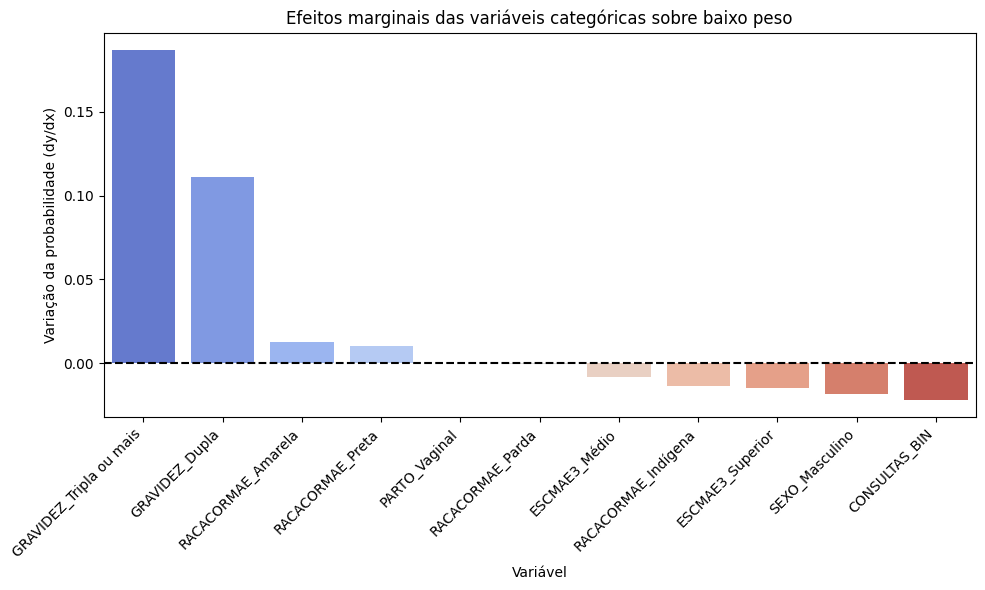

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===============================
# Efeitos marginais
# ===============================
efeitos_marginais = pd.DataFrame({
    'Variavel': ['IDADEMAE', 'SEMAGESTAC', 'QTDFILVIVO', 'QTDFILMORT',
                 'CONSULTAS_BIN', 'GRAVIDEZ_Dupla', 'GRAVIDEZ_Tripla ou mais',
                 'PARTO_Vaginal', 'RACACORMAE_Preta', 'RACACORMAE_Amarela',
                 'RACACORMAE_Parda', 'RACACORMAE_Indígena', 'SEXO_Masculino',
                 'ESCMAE3_Médio', 'ESCMAE3_Superior'],
    'dy_dx': [0.0006, -0.0326, -0.0082, 0.0057, -0.0219, 0.1108, 0.1867, -0.0000269,
              0.0102, 0.0123, -0.0008, -0.0139, -0.0183, -0.0081, -0.0150]
})

# Separando contínuas e categóricas
continuas = ['IDADEMAE', 'SEMAGESTAC', 'QTDFILVIVO', 'QTDFILMORT']
categoricas = efeitos_marginais[~efeitos_marginais['Variavel'].isin(continuas)]

# ===============================
# Gráfico de barras vertical, ordenado
# ===============================
plt.figure(figsize=(10,6))
sns.barplot(x='Variavel', y='dy_dx', data=categoricas,
            palette='coolwarm', order=categoricas.sort_values('dy_dx', ascending=False)['Variavel'])
plt.axhline(0, color='black', linestyle='--')
plt.title('Efeitos marginais das variáveis categóricas sobre baixo peso')
plt.ylabel('Variação da probabilidade (dy/dx)')
plt.xlabel('Variável')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
